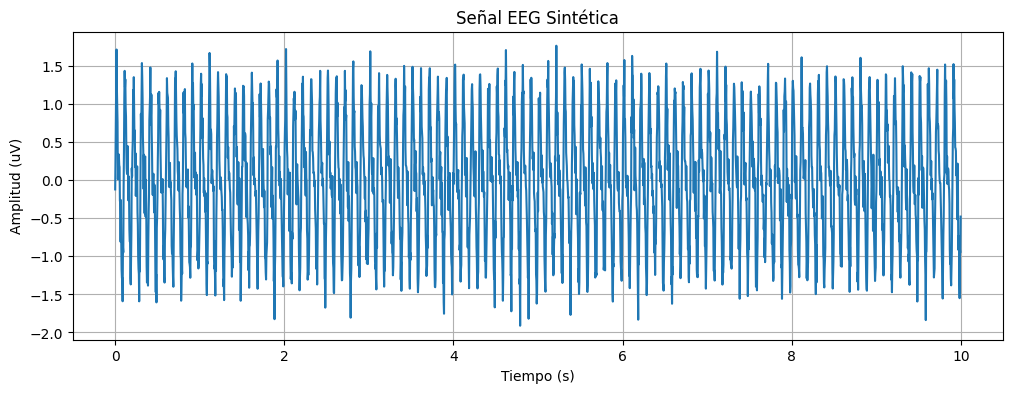

In [1]:
# 🧠 1. Simulación de señal EEG sintética

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Parámetros
fs = 250  # Hz
t = np.arange(0, 10, 1/fs)  # 10 segundos
alpha = np.sin(2 * np.pi * 10 * t)
beta = 0.5 * np.sin(2 * np.pi * 20 * t)
noise = 0.2 * np.random.randn(len(t))
signal = alpha + beta + noise

df = pd.DataFrame({'time': t, 'eeg_signal': signal})
df.to_csv("eeg_sintetico.csv", index=False)

# Visualización
plt.figure(figsize=(12, 4))
plt.plot(df['time'], df['eeg_signal'], label='EEG Simulada')
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud (uV)")
plt.title("Señal EEG Sintética")
plt.grid(True)
plt.show()


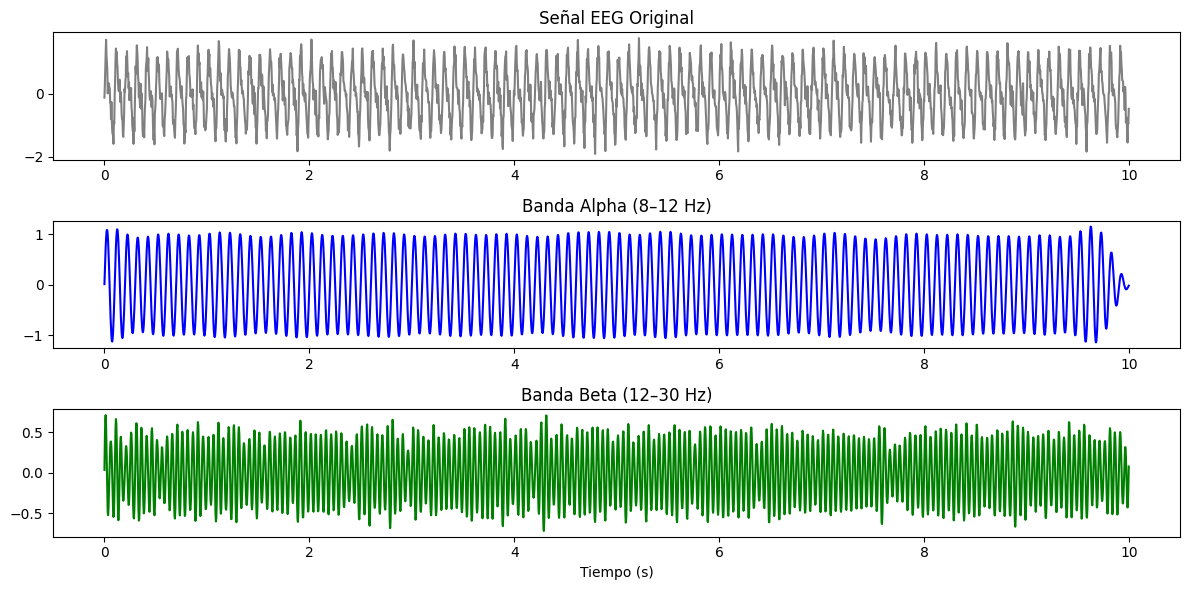

In [2]:
# 🔍 2. Filtro pasa banda

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

alpha_band = bandpass_filter(df['eeg_signal'], 8, 12, fs)
beta_band = bandpass_filter(df['eeg_signal'], 12, 30, fs)

# Visualización
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['time'], df['eeg_signal'], color='gray')
plt.title("Señal EEG Original")
plt.subplot(3, 1, 2)
plt.plot(df['time'], alpha_band, color='blue')
plt.title("Banda Alpha (8–12 Hz)")
plt.subplot(3, 1, 3)
plt.plot(df['time'], beta_band, color='green')
plt.title("Banda Beta (12–30 Hz)")
plt.xlabel("Tiempo (s)")
plt.tight_layout()
plt.show()


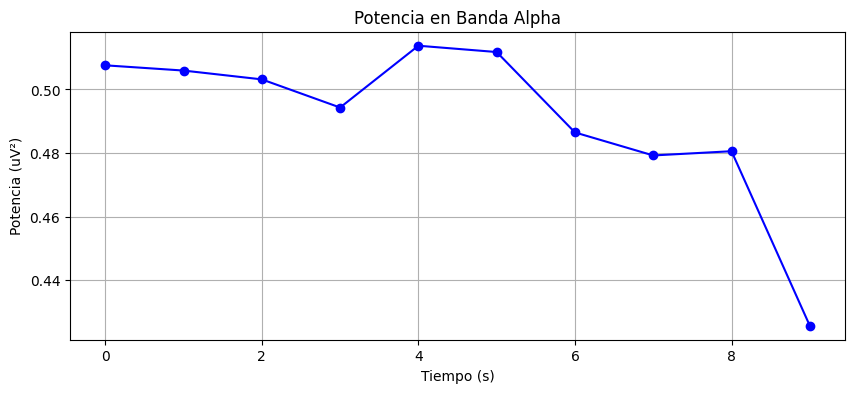

In [3]:
# 📊 3. Cálculo de potencia por ventanas

def compute_band_power(signal, fs, window_size=1.0):
    samples_per_window = int(window_size * fs)
    num_windows = len(signal) // samples_per_window
    powers = []
    for i in range(num_windows):
        window = signal[i * samples_per_window : (i+1) * samples_per_window]
        powers.append(np.mean(window**2))
    return np.array(powers)

alpha_power = compute_band_power(alpha_band, fs)
times = np.arange(len(alpha_power))

plt.figure(figsize=(10, 4))
plt.plot(times, alpha_power, marker='o', color='blue')
plt.title("Potencia en Banda Alpha")
plt.xlabel("Tiempo (s)")
plt.ylabel("Potencia (uV²)")
plt.grid(True)
plt.show()


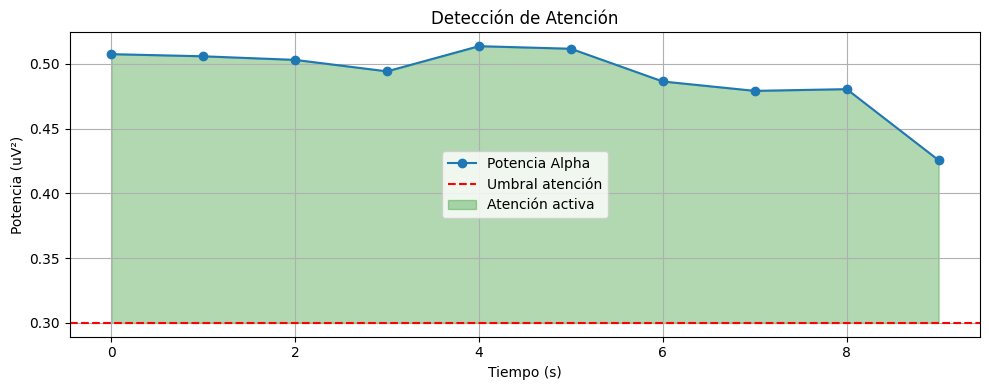

In [4]:
# ⚙️ 4. Condición lógica de atención

umbral_atencion = 0.3
estado_atencion = alpha_power > umbral_atencion

plt.figure(figsize=(10, 4))
plt.plot(times, alpha_power, marker='o', label='Potencia Alpha')
plt.axhline(umbral_atencion, color='red', linestyle='--', label='Umbral atención')
plt.fill_between(times, alpha_power, umbral_atencion, where=estado_atencion,
                 color='green', alpha=0.3, label='Atención activa')
plt.xlabel("Tiempo (s)")
plt.ylabel("Potencia (uV²)")
plt.title("Detección de Atención")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# 🎮 5. Animación interactiva con pygame (ejecutar localmente, no en Colab)

import pygame
import time

# Simulación por segundos (ajusta según tu señal real)
# En caso real: estado_atencion = (alpha_power > umbral_atencion)
estado_atencion = list(estado_atencion)

pygame.init()
WIDTH, HEIGHT = 600, 400
window = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("BCI Simulado - Atención Visual")

COLOR_NORMAL = (30, 30, 60)
COLOR_ATENCION = (100, 200, 100)
circle_radius = 40
circle_pos = [WIDTH // 2, HEIGHT // 2]

running = True
clock = pygame.time.Clock()
index = 0

while running and index < len(estado_atencion):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    if estado_atencion[index]:
        background_color = COLOR_ATENCION
        circle_color = (255, 255, 255)
    else:
        background_color = COLOR_NORMAL
        circle_color = (150, 150, 150)

    window.fill(background_color)
    pygame.draw.circle(window, circle_color, circle_pos, circle_radius)
    pygame.display.flip()
    clock.tick(1)
    index += 1

pygame.quit()


pygame 2.6.1 (SDL 2.28.4, Python 3.11.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
